In [2]:
from screenTools import *


In [55]:
controls = ["A1", "A2", "A3", "H10", "H11", "H12"]

r = importPlates(
    "./data/CMR_replicate_screen/220316_replicate1_cmr.xlsx",
    [1, 1, 2, 2],
    ["104", "86", "104", "86"],
).reset_index()
r["day"] = 1

r2 = importPlates(
    "./data/CMR_replicate_screen/220324_replicate2_cmr.xlsx",
    [1, 1, 2, 2],
    ["104", "86", "104", "86"],
).reset_index()
r2["day"] = 2

df = pd.concat([r, r2])
assignControls(df, controls)

normd = []

for i, r in df.iterrows():
    wt_mean = np.mean(
        df[
            (df["condition"]
            == "positive") & (df["day"]
            == r["day"]) & (df["plate_number"]
            == r["plate_number"]) & (df["peptide"]
            == r["peptide"])
        ]["value"]
    )
    normd.append(r["value"] / wt_mean)

df["normd"] = normd
df.head()


,index,row,column,value,plate_number,peptide,day,condition,normd
0,0,A,1,79078,1,104,1,positive,1.029125
1,1,A,2,41377,1,104,1,positive,0.538483
2,2,A,3,71462,1,104,1,positive,0.930010
3,3,A,4,15018,1,104,1,experimental,0.195445
4,4,A,5,87901,1,104,1,experimental,1.143948


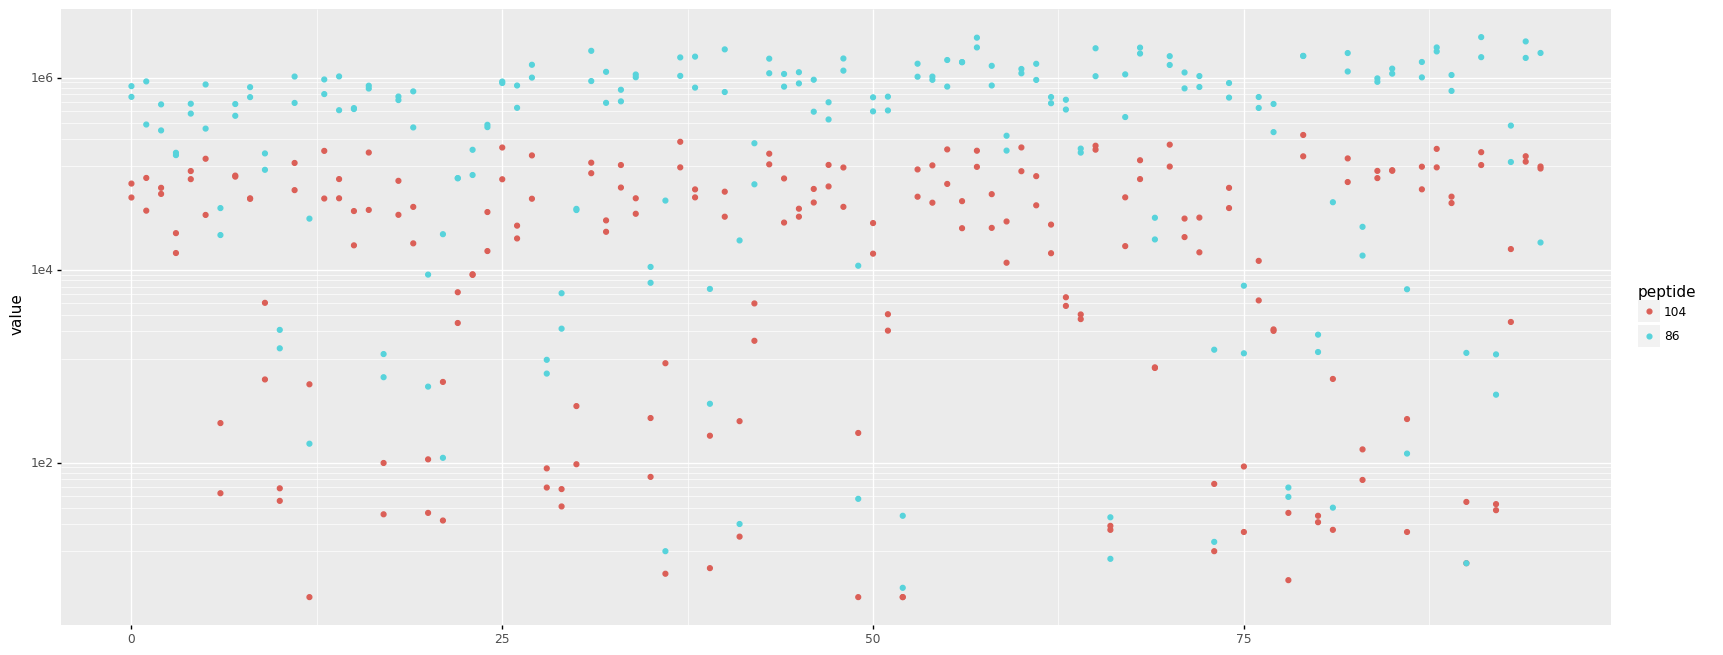

<ggplot: (8765577284581)>

In [20]:
import plotnine as pn

pn.options.figure_size = (20, 8)

(
    pn.ggplot(r, pn.aes(x=r.index, y="value", color="peptide"))
    + pn.geom_point()
    + pn.scale_y_log10()
)


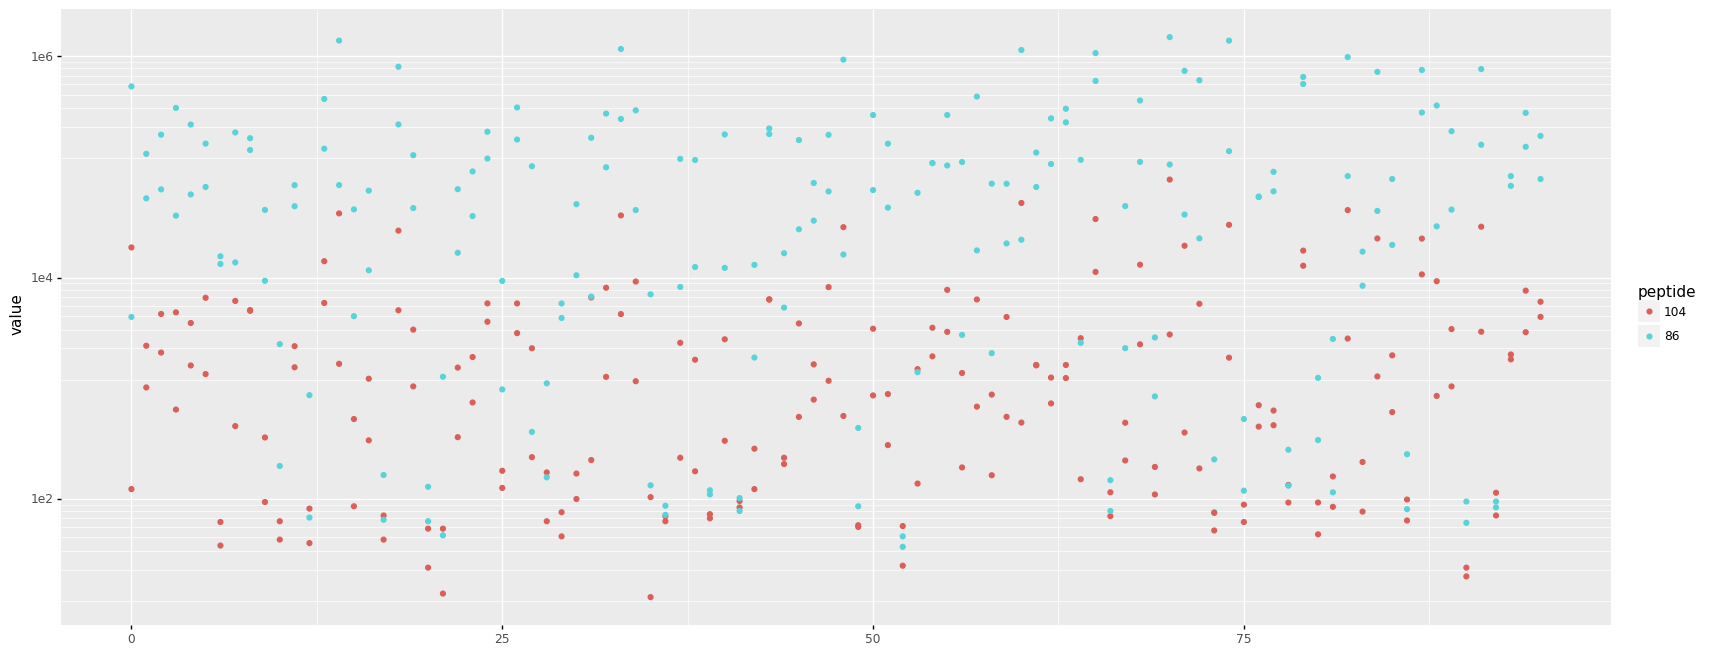

<ggplot: (8782831749105)>

In [4]:
import plotnine as pn

pn.options.figure_size = (20, 8)

(
    pn.ggplot(r2, pn.aes(x=r2.index, y="value", color="peptide"))
    + pn.geom_point()
    + pn.scale_y_log10()
)


In [56]:
dfp = pd.pivot(df, columns=["day"])
dfp.head()


index    row    column     value        plate_number    peptide       \
day     1  2   1  2      1  2      1      2            1  2       1    2   
0       0  0   A  A      1  1  79078  18752            1  1     104  104   
1       1  1   A  A      2  2  41377   1019            1  1     104  104   
2       2  2   A  A      3  3  71462   2105            1  1     104  104   
3       3  3   A  A      4  4  15018    643            1  1     104  104   
4       4  4   A  A      5  5  87901   3894            1  1     104  104   

        condition                   normd            
day             1             2         1         2  
0        positive      positive  1.029125  3.589930  
1        positive      positive  0.538483  0.195080  
2        positive      positive  0.930010  0.402987  
3    experimental  experimental  0.195445  0.123098  
4    experimental  experimental  1.143948  0.745477

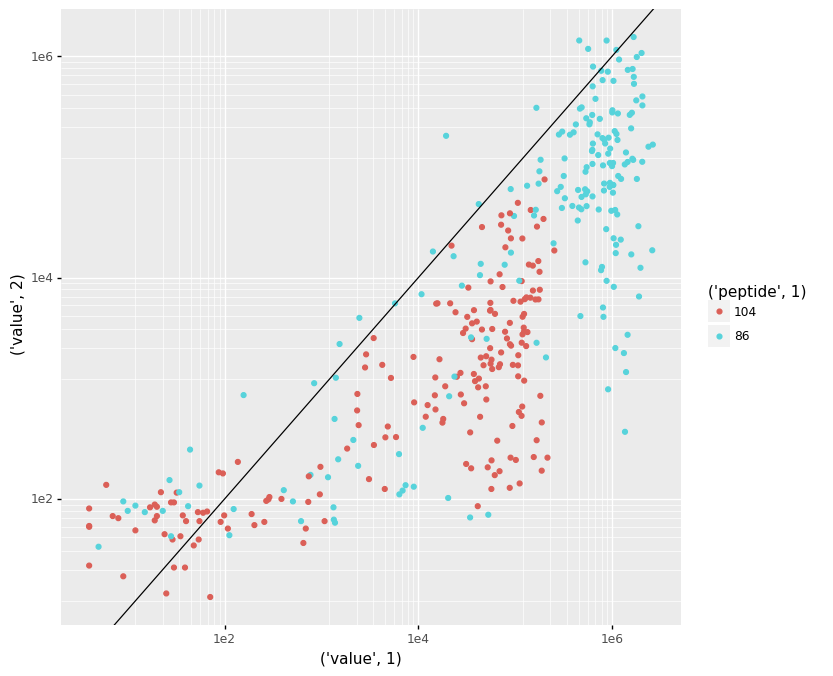

<ggplot: (8782832205303)>

In [27]:
pn.options.figure_size = (8, 8)

(
    pn.ggplot(
        dfp, pn.aes(x=dfp["value", 1], y=dfp["value", 2], color=dfp["peptide", 1])
    )
    + pn.geom_point()
    + pn.scale_y_log10()
    + pn.geom_abline(intercept=0, slope=1)
    + pn.scale_x_log10()
)


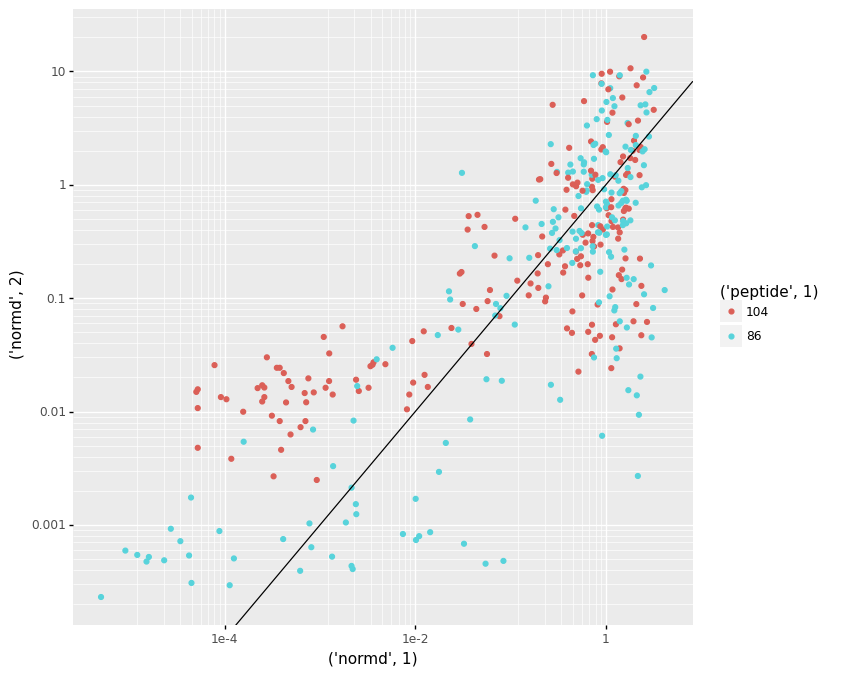

<ggplot: (8782867492479)>

In [57]:
pn.options.figure_size = (8, 8)

(
    pn.ggplot(
        dfp, pn.aes(x=dfp["normd", 1], y=dfp["normd", 2], color=dfp["peptide", 1])
    )
    + pn.geom_point()
    + pn.scale_y_log10()
    + pn.geom_abline(intercept=0, slope=1)
    + pn.scale_x_log10()
)

In [8]:
r_byplate = pd.concat(
    [
        r[r["plate_number"] == 1]["value"],
        r[r["plate_number"] == 2]["value"],
        r2[r2["plate_number"] == 1]["value"],
        r2[r2["plate_number"] == 2]["value"],
        r[r["plate_number"] == 1]["peptide"],
    ],
    axis=1,
    keys=["plate1 day1", "plate2 day1", "plate1 day2", "plate2 day2", "peptide"],
)

r_byplate


,plate1 day1,plate2 day1,plate1 day2,plate2 day2,peptide
0,79078,56666,18752,123,104
1,41377,90523,1019,2425,104
2,71462,61751,2105,4698,104
3,15018,24165,643,4857,104
4,87901,106717,3894,1609,104
...,...,...,...,...,...
91,2627221,1626000,158822,765699,86
92,1330,507,84,95,86
93,316466,132512,82690,67494,86
94,2370560,1597722,152040,307897,86


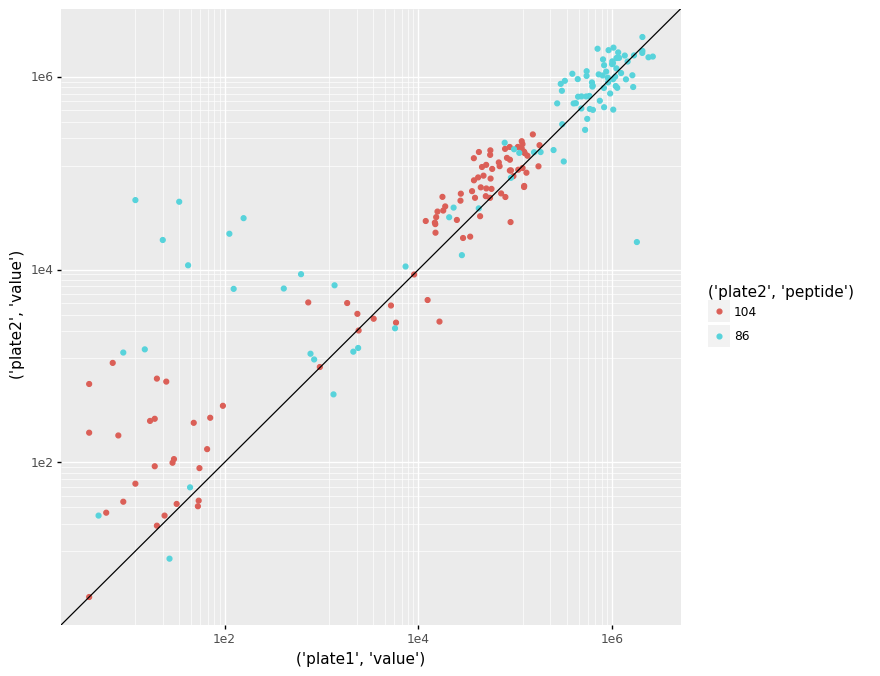

<ggplot: (8765561214663)>

In [36]:
pn.options.figure_size = (8, 8)

(
    pn.ggplot(
        r_byplate,
        pn.aes(
            x=r_byplate["plate1"],
            y=r_byplate["plate2", "value"],
            color=r_byplate["plate2", "peptide"],
        ),
    )
    + pn.geom_point()
    + pn.scale_y_log10()
    + pn.geom_abline(intercept=0, slope=1)
    + pn.scale_x_log10()
)


Looks like plate 1 was sometimes dimmer than plate 2, mostly with deviations in 86 light emission. Not sure why 86 would vary more than 104? Plate 2 might be slightly brighter overall. This could be accounted for by the fact that this is where the toothpick sat for the longest period? Does this also explain the bias in Abby's data with this regard?